<a href="https://colab.research.google.com/github/Mohamedasayed/Exercises-and-Assignments/blob/main/Copy_of_sentimental_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image.png](attachment:image.png)

In [ ]:
import re # matching patterns in strings
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.set_option("display.max_colWidth",200)
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
train = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [ ]:
# !pip uninstall -y scikit-learn
# !pip install scikit-learn==1.2.2
# !pip install pycaret --upgrade


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
print(train.head())

   id  label  \
0   1      0   
1   2      0   
2   3      0   
3   4      0   
4   5      0   

                                                                                                                        tweet  
0                       @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run  
1  @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked  
2                                                                                                         bihday your majesty  
3                                      #model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦    
4                                                                                      factsguide: society now    #motivation  


<h1>Check out few racist/sexist comments</h1>

In [ ]:
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


<h1>Check out few non racist/sexist comments</h1>

In [ ]:
train[train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [ ]:
train.shape,test.shape

((31962, 3), (17197, 2))

In [ ]:
#unbalanced data
train['label'].value_counts()

,label
0,29720
1,2242


# Check distribution of lengh of the comments in terms of words in both train and test data

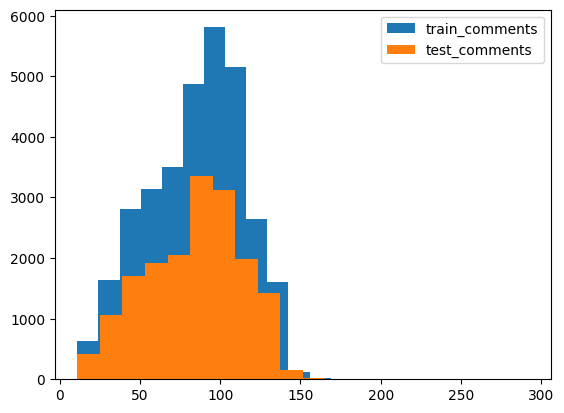

In [ ]:
lengh_train = train['tweet'].str.len()
lengh_test = test['tweet'].str.len()
plt.hist(lengh_train,bins=20,label='train_comments')
plt.hist(lengh_test,bins=20,label='test_comments')
plt.legend()
plt.show()

In [ ]:
df1_train = pd.DataFrame(train)
df2_test = pd.DataFrame(test)

In [ ]:
combined_data =pd.concat([df1_train,df2_test],axis=0,ignore_index=True)
combined_data.shape


(49159, 3)

# Remove unwanted text patterns from comments

In [ ]:
def remove_patteren(input_txt,pattern):
    r = re.findall(pattern,input_txt)
    for i in r :
        input_txt = re.sub(i,'',input_txt)
    return input_txt

1. Remove Twitter handles (@user).  
2. Delete punctuation, numbers, and special characters.  
3. Filter out short, unimportant words.  
4. Normalize text (e.g., "loving" → "love").  

**Goal**: Clean and standardize text for better analysis.

# <h1 style ='color: green' >1. Remove Twitter handles (@user). </h1>

In [ ]:
# create new column contain cleaned and processed comments

combined_data['tidy_tweets'] = np.vectorize(remove_patteren)(combined_data['tweet'],"@[\w]*")
combined_data.head()

,id,label,tweet,tidy_tweets
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


# <h1 style ='color: green'> 2. Delete punctuation, numbers, and special characters. <h1>

In [ ]:
combined_data['tidy_tweets'] = combined_data['tidy_tweets'].str.replace("[^a-zA-Z#]"," ")
combined_data.head(10)

<ipython-input-16-d3454112a78d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combined_data['tidy_tweets'] = combined_data['tidy_tweets'].str.replace("[^a-zA-Z#]"," ")


,id,label,tweet,tidy_tweets
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


# <h1 style = "color:green"> 3. Filter out short, unimportant words like oh ,hmm.<h1>

In [ ]:
combined_data["tidy_tweets"] = combined_data["tidy_tweets"].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))

combined_data.head(10)

,id,label,tweet,tidy_tweets
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fare talking before they leave chaos disputes when they there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,next school year year exams think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,love land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here


In [ ]:
tokenized_tweet = combined_data['tidy_tweets'].apply(lambda x :x.split())
tokenized_tweet.head()

,tidy_tweets
0,"[when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]"
1,"[thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]"
2,"[bihday, your, majesty]"
3,"[#model, love, take, with, time]"
4,"[factsguide, society, #motivation]"


In [ ]:
# normalized tokenized tweets

from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])


In [ ]:
#stitch tokens back together
for i in range (len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    combined_data['tidy_tweets'] = tokenized_tweet

![image.png](attachment:image.png)

# Use word Cloud to visualizr text lager size in most common and less frequent words appear smaller

In [ ]:
%pip install wordcloud

In [ ]:
from wordcloud import WordCloud

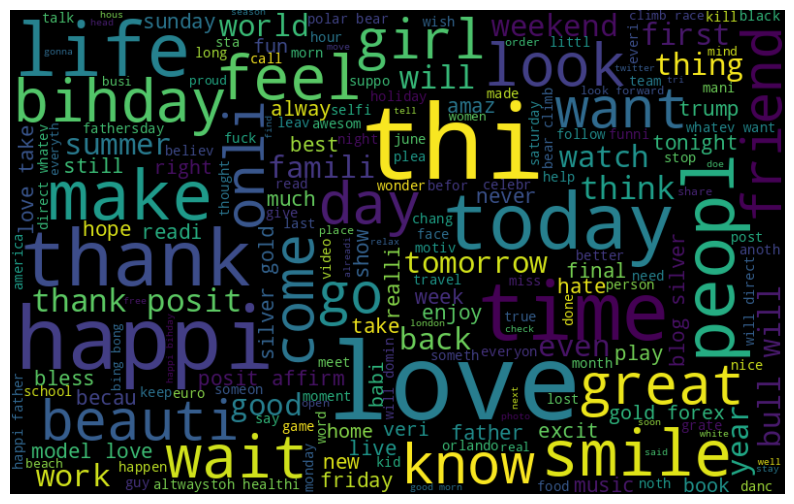

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming combined_data is already defined and contains a column 'tidy_tweets'
all_words = ' '.join([text for text in combined_data['tidy_tweets']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# Plot the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')  # Hide the axis
plt.show()


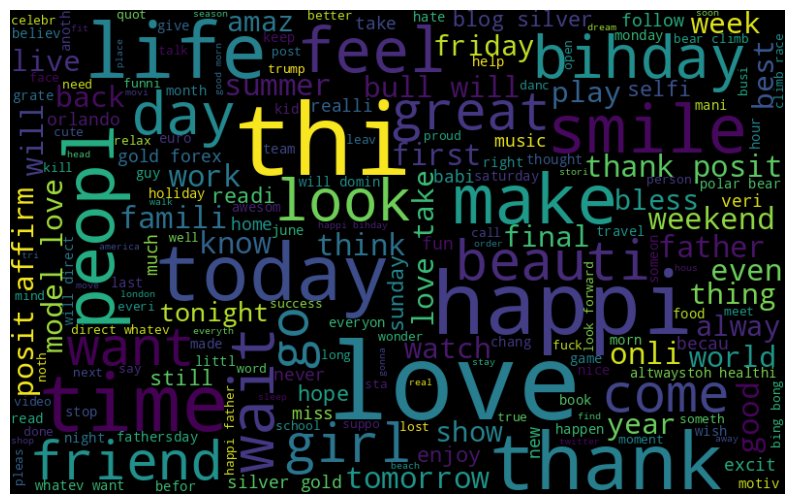

In [ ]:
# Generate word cloud for non-racist/sexist tweets
normal_words = ' '.join([text for text in combined_data['tidy_tweets'][combined_data['label'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

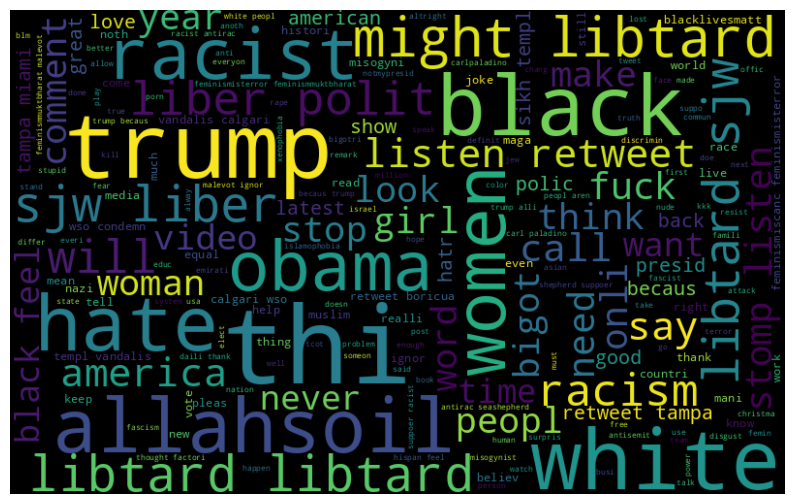

In [ ]:
# Generate word cloud for racist/sexist tweets
normal_words = ' '.join([text for text in combined_data['tidy_tweets'][combined_data['label'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Function to extract hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)  # Extract hashtags
        hashtags.append(ht)
    return hashtags

# Extract hashtags from non-racist/sexist tweets (label == 0)
HT_regular = hashtag_extract(combined_data['tidy_tweets'][combined_data['label'] == 0])

# Extract hashtags from racist/sexist tweets (label == 1)
HT_negative = hashtag_extract(combined_data['tidy_tweets'][combined_data['label'] == 1])

# Unnest the lists (flatten)
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])



In [ ]:
from collections import Counter
top_regular = Counter(HT_regular).most_common(10)
top_negative = Counter(HT_negative).most_common(10)
print(top_regular)
print(top_negative)


[('love', 1654), ('posit', 917), ('smile', 676), ('healthi', 573), ('thank', 534), ('fun', 463), ('life', 425), ('affirm', 423), ('summer', 390), ('model', 375)]
[('trump', 136), ('polit', 95), ('allahsoil', 92), ('liber', 81), ('libtard', 77), ('sjw', 75), ('retweet', 63), ('black', 46), ('miami', 46), ('hate', 37)]


<ipython-input-28-6a692d273785>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x="Hashtag", y="Count" ,palette='viridis')


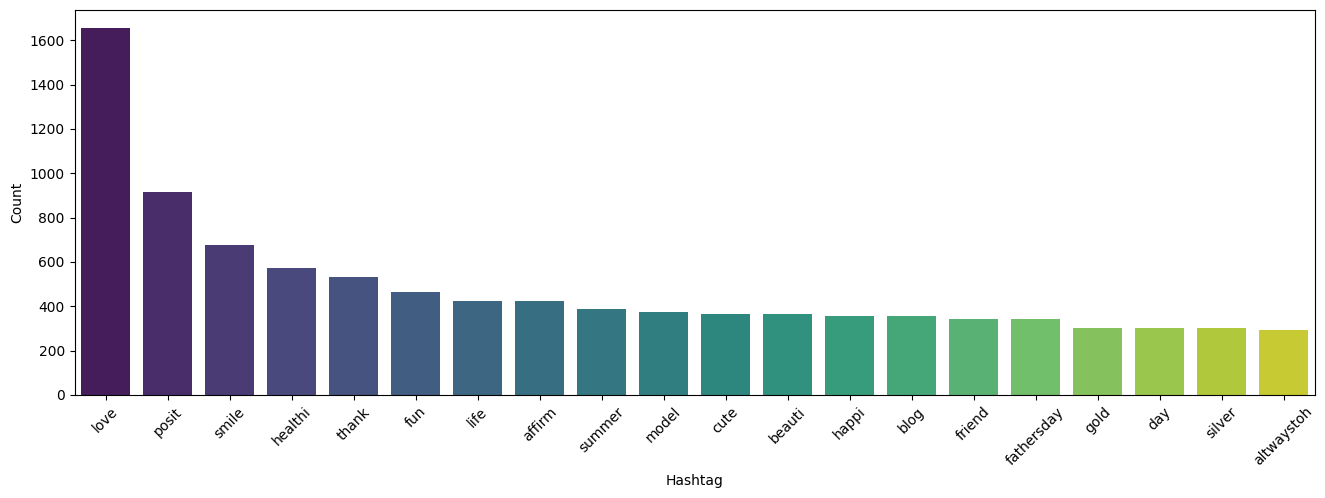

In [ ]:
# Calculate frequency distribution of hashtags
a = nltk.FreqDist(HT_regular)

# Create DataFrame of hashtags and their counts
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})

# Select top 20 most frequent hashtags
d = d.nlargest(columns="Count", n=20)

# Plot the bar chart
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x="Hashtag", y="Count" ,palette='viridis')
ax.set(ylabel='Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

<ipython-input-29-693966fd69ec>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Hashtag'),
 Text(0.5, 1.0, 'Top 20 Hashtags in Offensive Tweets')]

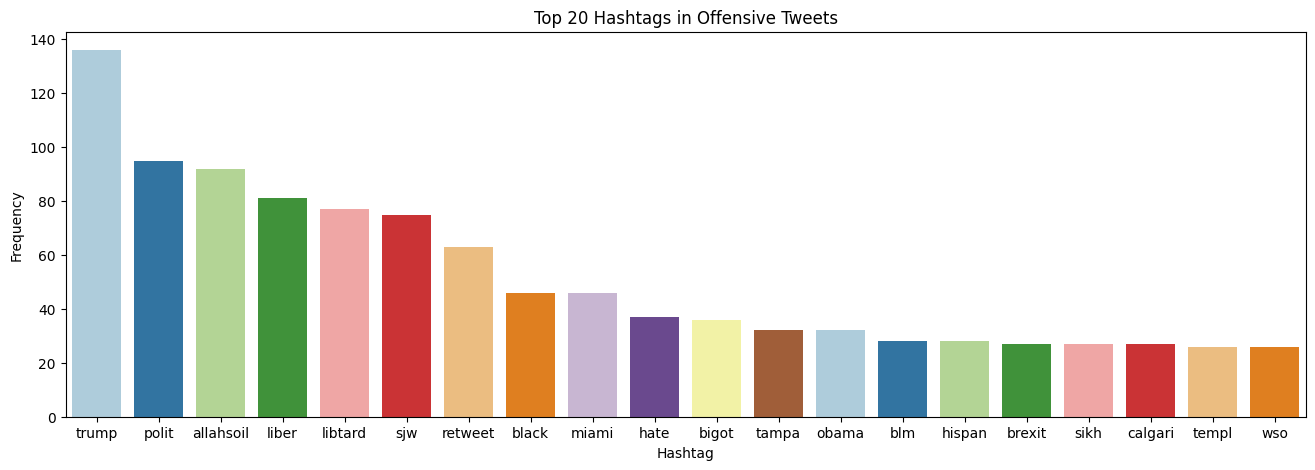

In [ ]:
# Calculate frequency distribution of negative hashtags
b = nltk.FreqDist(HT_negative)

# Create DataFrame
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# Select top 20 hashtags
e = e.nlargest(columns="Count", n=20)

# Create plot with red color palette (appropriate for negative content)
plt.figure(figsize=(16,5))
ax = sns.barplot(
    data=e,
    x="Hashtag",
    y="Count",
    palette="Paired",  # Red color gradient (dark to light)

)

# Customize plot appearance
ax.set(
    ylabel='Frequency',
    xlabel='Hashtag',
    title='Top 20 Hashtags in Offensive Tweets'
)

# <h1 style="color: magenta"> Bag of words features <h1>

![image.png](attachment:image.png)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(
    max_df=0.90,
    min_df=2,
    max_features=1000,
    stop_words='english'
)
bow = bow_vectorizer.fit_transform(combined_data['tidy_tweets'])
bow.shape


(49159, 1000)

In [ ]:
# !pip install mlflow

In [ ]:
# # Clean install with compatible versions
# !pip uninstall -y pycaret scikit-learn mlflow
# !pip install pycaret==3.2 scikit-learn==1.2.2 mlflow==2.2.2


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from pycaret.classification import *

# Drop rows with missing labels
combined_data = combined_data.dropna(subset=['label'])

# 1. Create Bag of Words representation
bow_vectorizer = CountVectorizer(
    max_df=0.90,
    min_df=2,
    max_features=1000,
    stop_words='english'
)

bow = bow_vectorizer.fit_transform(combined_data['tidy_tweets'])  # Your cleaned tweets

# 2. Convert sparse matrix to DataFrame
bow_df = pd.DataFrame(bow.toarray(), columns=bow_vectorizer.get_feature_names_out())

# 3. Add custom name for label column (e.g., 'sentiment')
bow_df['sentiment'] = combined_data['label'].values

# 4. Setup PyCaret classification with custom label name
clf = setup(
    data=bow_df,
    target='sentiment',
    session_id=42,
    use_gpu=True,
    log_experiment=True,
    experiment_name='BoW_Classifier'
)

# 5. Train and compare models
best_model = compare_models()

# 6. Save best model (optional)
save_model(best_model, 'BoW_Sentiment_Model')


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,42
1,Target,sentiment
2,Target type,Binary
3,Original data shape,"(31962, 1001)"
4,Transformed data shape,"(31962, 1001)"
5,Transformed train set shape,"(22373, 1001)"
6,Transformed test set shape,"(9589, 1001)"
7,Numeric features,1000
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9500,0.9115,0.3939,0.7910,0.5242,0.5010,0.5359,1.6890
svm,SVM - Linear Kernel,0.9496,0.0000,0.3767,0.8022,0.5102,0.4874,0.5275,1.2020
xgboost,Extreme Gradient Boosting,0.9492,0.9046,0.3652,0.8087,0.5016,0.4789,0.5220,3.1870
lr,Logistic Regression,0.9487,0.9121,0.3748,0.7839,0.5055,0.4821,0.5196,2.4600
gbc,Gradient Boosting Classifier,0.9476,0.8187,0.2976,0.8693,0.4426,0.4220,0.4903,22.5630
ridge,Ridge Classifier,0.9469,0.0000,0.3257,0.7983,0.4612,0.4385,0.4884,1.6260
ada,Ada Boost Classifier,0.9459,0.8445,0.3372,0.7644,0.4650,0.4411,0.4838,8.7750
lda,Linear Discriminant Analysis,0.9442,0.8849,0.4583,0.6475,0.5347,0.5060,0.5156,6.8360
rf,Random Forest Classifier,0.9404,0.8827,0.5347,0.5839,0.5566,0.5248,0.5262,26.6240
knn,K Neighbors Classifier,0.9397,0.8092,0.2983,0.6550,0.4089,0.3819,0.4154,4.7280


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['abl', 'absolut', 'accept',
                                              'account', 'act', 'action',
                                              'actor', 'actual', 'adapt',
                                              'adult', 'adventur', 'affect',
                                              'affirm', 'afternoon', 'agre',
                                              'ahead', 'aist', 'album', 'aliv',
                                              'allahsoil', 'allow', 'alon',
                                              'alreadi', 'altwaystoh', 'alway',
                                              'amaz', 'america', 'americ...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                            


# <h1 style="color: magenta"> Term Frequency - Inverse Document Frequency <h1>
 <l1 style = "color: magenta "> It’s a way to give importance to useful words in a collection of text (like tweets), better than just counting them like in Bag-of-Words.<l1>

![image.png](attachment:image.png)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    max_df=0.90,
    min_df=2,
    max_features=1000,
    stop_words='english'
)

tfidf = tfidf_vectorizer.fit_transform(combined_data['tidy_tweets'])
tfidf.shape


(31962, 1000)

# <h1 style="color: magenta;">Word2Vec</h1>
<p style="color: magenta;">
  Word2Vec converts each word into a vector—a list of numbers—that captures its meaning and context.<br><br>
  Unlike Bag of Words (BoW) or TF-IDF, Word2Vec understands the relationships between words based on their context. For example:<br><br>
  <code>"king" - "man" + "woman" ≈ "queen" ✅</code><br><br>
  This makes it much more effective for deep learning and natural language processing (NLP) tasks.
</p>


In [ ]:
# Tokenization
tokenized_tweet = combined_data['tidy_tweets'].apply(lambda x: x.split())


In [ ]:
# %pip install gensim

![image.png](attachment:image.png)

In [ ]:
import gensim

model_w2v = gensim.models.Word2Vec(

    tokenized_tweet,
    vector_size=200,
    window=5,
    min_count=2,
    sg=1,
    hs=0,
    negative=10,
    workers=3,
    seed=34
)


In [ ]:
model_w2v.train(
    tokenized_tweet,
    total_examples=len(combined_data['tidy_tweets']),
    epochs=20
)


(4162523, 4904460)

#  Finding Most similar words

In [ ]:
model_w2v.wv.most_similar(positive="dinner")

[('#cellar', 0.6284676790237427),
 ('aladdin', 0.6160180568695068),
 ('spaghetti', 0.5986828207969666),
 ('lunchtim', 0.5875571966171265),
 ('enrout', 0.5833414196968079),
 ('#smile#lov', 0.5825948119163513),
 ('spici', 0.5739829540252686),
 ('beaver', 0.5716009736061096),
 ('lamb', 0.5714536309242249),
 ('#vineyard', 0.5707311034202576)]

In [ ]:
model_w2v.wv.most_similar(positive="trump")

[('#dumptrump', 0.5732356905937195),
 ('quaint', 0.5546351671218872),
 ('unstabl', 0.5496701002120972),
 ('#delegaterevolt', 0.5471379160881042),
 ('commi', 0.5456444025039673),
 ('hillari', 0.5449977517127991),
 ('donald', 0.5386044383049011),
 ('presidenti', 0.5325709581375122),
 ('unfit', 0.5319189429283142),
 ('whoa', 0.5291804671287537)]

In [ ]:
model_w2v.wv['food']

array([ 0.02344688, -0.3278399 ,  0.11173068,  0.40860638, -0.5424374 ,
        0.744424  ,  0.16014515,  0.31529033,  0.6633941 , -0.80376285,
        0.5120635 ,  0.5680435 ,  0.17113326,  0.14575319,  0.00375749,
       -0.24395162,  0.43215236,  0.13192362, -0.4978303 , -0.19563444,
        0.20276135,  0.58344203, -0.21980433,  0.62294465, -0.45130274,
       -0.27023175, -0.05309526, -0.5184971 ,  0.85654956, -0.29060638,
        0.543297  , -0.460872  , -0.25265294, -0.7173419 , -0.44553143,
       -0.01635754,  0.23354709, -0.25265187, -0.03339417, -0.15715379,
       -0.3928998 ,  0.22441265,  0.12007388,  0.35949975, -0.00256471,
       -0.08847602,  0.02558599, -0.1799818 , -1.4404715 , -0.82862353,
        0.25066507, -0.09643177,  0.35921866,  0.14165369,  0.33330247,
        0.5664009 , -0.24374172,  0.0983896 ,  0.19277829, -0.2776802 ,
       -0.44947404,  0.02766376, -0.13094343,  0.39611942,  0.04321681,
        0.4164361 ,  1.3199987 ,  0.3710645 , -0.06367742, -0.22

In [ ]:
len(model_w2v.wv['food'])

200

# <p style = "color : cyan"> Preparing Vectors for Tweets not just a word </p>

![image.png](attachment:image.png)

In [ ]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError:  # Handle words not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

# Preparing word2vec feature set...
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))  # Fixed parentheses and spelling

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i, :] = word_vector(tokenized_tweet[i], 200)

wordvec_df = pd.DataFrame(wordvec_arrays)
print(wordvec_df.shape)

(31962, 200)


<!-- Algorithms to build models -->
<h2 style="color: cyan;">Algorithms to Build Models</h2>
<ol style="color: cyan;">
    <li>Logistic Regression</li>
    <li>Support Vector Machine (SVM)</li>
    <li>Random Forest</li>
    <li>XGBoost</li>
</ol>

<!-- Evaluation Metric -->
<h2 style="color: cyan;">Evaluation Metric</h2>
<p style="color: cyan;"><strong>F1 Score</strong></p>

<p>
الإيجابيات الحقيقية (TP):
حالات تم التنبؤ بها بشكل صحيح كـ "نعم" (إيجابية)، وتوافق القيمة الفعلية.

السلبيات الحقيقية (TN):
حالات تم التنبؤ بها بشكل صحيح كـ "لا" (سلبية)، وتوافق القيمة الفعلية.

الإيجابيات الكاذبة (FP):
تنبؤ خاطئ بـ "نعم" (إيجابية) بينما القيمة الفعلية "لا" (سلبية).

السلبيات الكاذبة (FN):
تنبؤ خاطئ بـ "لا" (سلبية) بينما القيمة الفعلية "نعم" (إيجابية).
</P>


# <h2 style ="color : cyan"> Logistic reg & bag of words <h2>

In [ ]:

train_bow = bow[:31962, :]
test_bow = bow[31962:, :]

from sklearn.model_selection import train_test_split
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(
    train_bow,
    train['label'],
    test_size=0.3,
    random_state=42
)


from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain)


import numpy as np
prediction = lreg.predict_proba(xvalid_bow)
prediction_int = (prediction[:, 1] >= 0.3).astype(int)


from sklearn.metrics import f1_score
print("F1-Score:", f1_score(yvalid, prediction_int))

F1-Score: 0.5336658354114713


In [ ]:
# Prediction
test_pred = lreg.predict_proba(test_bow)  #  (0 / 1)

test_pred_int = (test_pred[:, 1] >= 0.3)
test_pred_int = test_pred_int.astype(int)
test['label'] = test_pred_int


submission = test[['id', 'label']]

submission.to_csv('sub_lreg_bow.csv', index=False)

# <h2 style ="color : cyan"> Logistic reg & TF-IDF <h2>

In [ ]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]  #

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

# Train and predict
lreg.fit(xtrain_tfidf, ytrain)
prediction = lreg.predict_proba(xvalid_tfidf)

# Convert probabilities to binary predictions with 0.3 threshold
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(int)

# Calculate F1 score
tfidf_f1 = f1_score(yvalid, prediction_int)
print(f"TF-IDF F1 Score: {tfidf_f1:.3f}")

# <h2 style ="color : cyan"> Logistic reg & Word2Vec <h2>

In [ ]:
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]  # Fixed the typo from original image (31962,::)

# Split into training and validation sets
xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

# Train and predict
lreg.fit(xtrain_w2v, ytrain)
prediction = lreg.predict_proba(xvalid_w2v)

# Convert probabilities to binary predictions with 0.3 threshold
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(int)

# Calculate F1 score
w2v_f1 = f1_score(yvalid, prediction_int)
print(f"Word2Vec F1 Score: {w2v_f1:.3f}")